In [1]:
#@title Install Packages

In [2]:
!pip install -q transformers
!pip install -q torchinfo
!pip install -q datasets
!pip install -q evaluate
!pip install -q nltk
!pip install -q contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12

In [3]:
!sudo apt-get update
! sudo apt-get install tree

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,381 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,978 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubu

In [4]:
#@title Imports
import nltk
from nltk.tokenize import RegexpTokenizer

import evaluate
import transformers

import contractions

from torchinfo import summary
from datasets import load_dataset

from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

import spacy

In [5]:
# @title Mount Google Drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
dir_root = '/content/drive/MyDrive/266-final/'
# dir_data = '/content/drive/MyDrive/266-final/data/'
# dir_data = '/content/drive/MyDrive/266-final/data/se21-t1-comp-lex-master/'
dir_data = '/content/drive/MyDrive/266-final/data/266-comp-lex-master'
dir_models = '/content/drive/MyDrive/266-final/models/'
dir_results = '/content/drive/MyDrive/266-final/results/'

In [8]:
!tree /content/drive/MyDrive/266-final/data/266-comp-lex-master/

/content/drive/MyDrive/266-final/data/266-comp-lex-master/
├── fe-test-labels
├── fe-train
├── fe-trial-val
├── test-labels
│   ├── lcp_multi_test.tsv
│   └── lcp_single_test.tsv
├── train
│   ├── lcp_multi_train.tsv
│   └── lcp_single_train.tsv
└── trial
    ├── lcp_multi_trial.tsv
    └── lcp_single_trial.tsv

6 directories, 6 files


In [9]:
!ls -R /content/drive/MyDrive/266-final/data/266-comp-lex-master/

/content/drive/MyDrive/266-final/data/266-comp-lex-master/:
fe-test-labels	fe-train  fe-trial-val	test-labels  train  trial

/content/drive/MyDrive/266-final/data/266-comp-lex-master/fe-test-labels:

/content/drive/MyDrive/266-final/data/266-comp-lex-master/fe-train:

/content/drive/MyDrive/266-final/data/266-comp-lex-master/fe-trial-val:

/content/drive/MyDrive/266-final/data/266-comp-lex-master/test-labels:
lcp_multi_test.tsv  lcp_single_test.tsv

/content/drive/MyDrive/266-final/data/266-comp-lex-master/train:
lcp_multi_train.tsv  lcp_single_train.tsv

/content/drive/MyDrive/266-final/data/266-comp-lex-master/trial:
lcp_multi_trial.tsv  lcp_single_trial.tsv


In [10]:
#@title Import Data

In [11]:
# train_single_df = pd.read_csv(os.path.join(dir_data, "train", "lcp_single_train.tsv"), sep="\t")
# train_multi_df = pd.read_csv(os.path.join(dir_data, "train", "lcp_multi_train.tsv"), sep="\t")

# trail_val_single_df = pd.read_csv(os.path.join(dir_data, "trial", "lcp_single_trial.tsv"), sep="\t")
# trail_val_multi_df = pd.read_csv(os.path.join(dir_data, "trial", "lcp_multi_trial.tsv"), sep="\t")

# test_single_df = pd.read_csv(os.path.join(dir_data, "test-labels", "lcp_single_test.tsv"), sep="\t")
# test_multi_df = pd.read_csv(os.path.join(dir_data, "test-labels", "lcp_multi_test.tsv"), sep="\t")

In [12]:
# # Try to load the files containing unterminated strings
# try:
#     # Approach 1: Try with the C engine but with error handling
#     multi_test_df = pd.read_csv(
#         os.path.join(dir_data, "test", "lcp_multi_test.tsv"),
#         sep="\t",
#         on_bad_lines='skip'  # Skip bad lines
#     )
#     print("Loaded with skipping bad lines")
# except Exception as e:
#     print(f"First approach failed: {e}")
#     try:
#         # Approach 2: Try with the Python engine which might be more forgiving
#         multi_test_df = pd.read_csv(
#             os.path.join(dir_data, "test", "lcp_multi_test.tsv"),
#             sep="\t",
#             engine="python",
#             quoting=3  # QUOTE_NONE
#         )
#         print("Loaded with Python engine")


In [13]:
# Load train data into train_*_df
train_single_df = pd.read_csv(
    os.path.join(dir_data, "train", "lcp_single_train.tsv"),
    sep = "\t",
    engine = "python",
    quoting = 3
)
train_multi_df = pd.read_csv(
    os.path.join(dir_data, "train", "lcp_multi_train.tsv"),
    sep = "\t",
    engine = "python",
    quoting = 3
)

# Load trial data into trial_val_*_df
trial_val_single_df = pd.read_csv(
    os.path.join(dir_data, "trial", "lcp_single_trial.tsv"),
    sep = "\t",
    engine = "python",
    quoting = 3
)
trial_val_multi_df = pd.read_csv(
    os.path.join(dir_data, "trial", "lcp_multi_trial.tsv"),
    sep = "\t",
    engine = "python",
    quoting = 3
)

# Load test data (with labels) into test_*_df
test_single_df = pd.read_csv(
    os.path.join(dir_data, "test-labels", "lcp_single_test.tsv"),
    sep = "\t",
    engine = "python",
    quoting = 3
)
test_multi_df = pd.read_csv(
    os.path.join(dir_data, "test-labels", "lcp_multi_test.tsv"),
    sep = "\t",
    engine = "python",
    quoting = 3
)

print("Data successfully loaded into train, trial-val, and test variables")

Data successfully loaded into train, trial-val, and test variables


In [14]:
#@title EDA

In [15]:
def print_dataframe_summary(df_name, df):
    # Print section header
    print(f"========== {df_name} ==========")

    # Shape and Columns
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}\n")

    # Data Types
    print("Data Types:")
    print(df.dtypes)
    print()

    # Missing Values
    print("Missing Values (by column):")
    print(df.isna().sum())
    print()

    # 'complexity' column stats
    desc = df['complexity'].describe()  # count, mean, std, min, 25%, 50%, 75%, max
    print("'complexity' Column Stats (incl. quartiles and median):")
    print(desc)

    # Calculate frequency counts for each quartile range
    q1 = desc['25%']
    q2 = desc['50%']  # This is the median
    q3 = desc['75%']
    q_max = desc['max']

    # Note: We'll define the ranges as:
    #   <= Q1
    #   > Q1 and <= Q2
    #   > Q2 and <= Q3
    #   > Q3

    freq_q1 = np.sum(df['complexity'] <= q1)
    freq_q2 = np.sum((df['complexity'] > q1) & (df['complexity'] <= q2))
    freq_q3 = np.sum((df['complexity'] > q2) & (df['complexity'] <= q3))
    freq_q4 = np.sum(df['complexity'] > q3)

    print()
    print("Quartile Frequency Counts (tab-separated next to each quartile):")
    print(f"25%: {q1}\tCount (<= Q1): {freq_q1}")
    print(f"50% (Median): {q2}\tCount (Q1 < x <= Q2): {freq_q2}")
    print(f"75%: {q3}\tCount (Q2 < x <= Q3): {freq_q3}")
    print(f"100% (Max): {q_max}\tCount (Q3 < x <= Max): {freq_q4}")

    print("======================================\n")

# Now we call this for each of our dataframes
print_dataframe_summary("train_single_df", train_single_df)
print_dataframe_summary("train_multi_df", train_multi_df)
print_dataframe_summary("trial_val_single_df", trial_val_single_df)
print_dataframe_summary("trial_val_multi_df", trial_val_multi_df)
print_dataframe_summary("test_single_df", test_single_df)
print_dataframe_summary("test_multi_df", test_multi_df)


========== train_single_df ==========
Shape: (7662, 5)
Columns: ['id', 'corpus', 'sentence', 'token', 'complexity']

Data Types:
id             object
corpus         object
sentence       object
token          object
complexity    float64
dtype: object

Missing Values (by column):
id            0
corpus        0
sentence      0
token         7
complexity    0
dtype: int64

'complexity' Column Stats (incl. quartiles and median):
count    7662.000000
mean        0.302288
std         0.132977
min         0.000000
25%         0.211538
50%         0.279412
75%         0.375000
max         0.861111
Name: complexity, dtype: float64

Quartile Frequency Counts (tab-separated next to each quartile):
25%: 0.2115384615384615	Count (<= Q1): 1928
50% (Median): 0.2794117647058823	Count (Q1 < x <= Q2): 1937
75%: 0.375	Count (Q2 < x <= Q3): 1984
100% (Max): 0.8611111111111112	Count (Q3 < x <= Max): 1813

========== train_multi_df ==========
Shape: (1517, 5)
Columns: ['id', 'corpus', 'sentence', 'token'

In [16]:
print(train_single_df.head())

                               id corpus  \
0  3ZLW647WALVGE8EBR50EGUBPU4P32A  bible   
1  34R0BODSP1ZBN3DVY8J8XSIY551E5C  bible   
2  3S1WOPCJFGTJU2SGNAN2Y213N6WJE3  bible   
3  3BFNCI9LYKQN09BHXHH9CLSX5KP738  bible   
4  3G5RUKN2EC3YIWSKUXZ8ZVH95R49N2  bible   

                                            sentence     token  complexity  
0  Behold, there came up out of the river seven c...     river    0.000000  
1  I am a fellow bondservant with you and with yo...  brothers    0.000000  
2  The man, the lord of the land, said to us, 'By...  brothers    0.050000  
3  Shimei had sixteen sons and six daughters; but...  brothers    0.150000  
4               "He has put my brothers far from me.  brothers    0.263889  


In [17]:
print(train_multi_df.head())

                               id corpus  \
0  3S37Y8CWI80N8KVM53U4E6JKCDC4WE  bible   
1  3WGCNLZJKF877FYC1Q6COKNWTDWD11  bible   
2  3UOMW19E6D6WQ5TH2HDD74IVKTP5CB  bible   
3  36JW4WBR06KF9AXMUL4N476OMF8FHD  bible   
4  3HRWUH63QU2FH9Q8R7MRNFC7JX2N5A  bible   

                                            sentence            token  \
0  but the seventh day is a Sabbath to Yahweh you...      seventh day   
1  But let each man test his own work, and then h...         own work   
2  To him who by understanding made the heavens; ...  loving kindness   
3  Remember to me, my God, this also, and spare m...  loving kindness   
4  Because your loving kindness is better than li...  loving kindness   

   complexity  
0    0.027778  
1    0.050000  
2    0.050000  
3    0.050000  
4    0.075000  


In [18]:
#@title Data Engineering

In [19]:
# Assuming you have already loaded the DataFrames:
# train_single_df, train_multi_df, trial_val_single_df, trial_val_multi_df, test_single_df, test_multi_df

def print_distinct_values(df, column_name):
    """Prints the distinct values of a specified column in a DataFrame."""
    distinct_values = df[column_name].unique()
    print(f"Distinct values in '{column_name}' column:")
    for value in distinct_values:
        print(value)
    print("-" * 30)  # Separator

# Print distinct values for each DataFrame
print_distinct_values(train_single_df, "corpus")
print_distinct_values(train_multi_df, "corpus")
print_distinct_values(trial_val_single_df, "subcorpus")
print_distinct_values(trial_val_multi_df, "subcorpus")
print_distinct_values(test_single_df, "corpus")
print_distinct_values(test_multi_df, "corpus")

Distinct values in 'corpus' column:
bible
biomed
europarl
------------------------------
Distinct values in 'corpus' column:
bible
biomed
europarl
------------------------------
Distinct values in 'subcorpus' column:
bible
biomed
europarl
------------------------------
Distinct values in 'subcorpus' column:
bible
biomed
europarl
------------------------------
Distinct values in 'corpus' column:
bible
biomed
europarl
------------------------------
Distinct values in 'corpus' column:
bible
biomed
europarl
------------------------------


## standardize column headers: convert trial_val header from 'subcorpus' to 'corpus'

In [20]:
# Rename the 'subcorpus' column to 'corpus'
trial_val_single_df = trial_val_single_df.rename(columns={'subcorpus': 'corpus'})
trial_val_multi_df = trial_val_multi_df.rename(columns={'subcorpus': 'corpus'})

# Verify the change (optional)
print(trial_val_single_df.columns)
print(trial_val_multi_df.columns)

Index(['id', 'corpus', 'sentence', 'token', 'complexity'], dtype='object')
Index(['id', 'corpus', 'sentence', 'token', 'complexity'], dtype='object')


In [21]:
dataframes = [train_single_df, train_multi_df, trial_val_single_df, trial_val_multi_df, test_single_df, test_multi_df]

# Get the headers (column names) of the first DataFrame as a reference
reference_headers = list(dataframes[0].columns)

# Loop through the remaining DataFrames and compare headers
all_headers_match = True
for df in dataframes[1:]:
    if list(df.columns) != reference_headers:
        all_headers_match = False
        print(f"Headers do not match for DataFrame: {df.head(0)}")  # Print which DataFrame has different headers
        break  # Exit the loop if a mismatch is found

# Print the result
if all_headers_match:
    print("All DataFrames have matching headers.")
else:
    print("Headers do not match for all DataFrames.")

All DataFrames have matching headers.


## Interrogate Span Length by Corpus Value by Data Split

In [22]:
# Analyzing sentence spans by complexity quartile and corpus

tokenizer = RegexpTokenizer(r'\w+') # setup tokenizer

def analyze_sentence_spans_by_corpus_and_quartile(dfs_dict):
    """
    Analyze sentence spans (length metrics) grouped by corpus and complexity quartile
    for multiple dataframes.
    """
    results = []

    for df_name, df in dfs_dict.items():
        print(f"Processing {df_name}...")

        # Calculate complexity quartiles for this dataframe
        q1 = df['complexity'].quantile(0.25)
        q2 = df['complexity'].quantile(0.50)
        q3 = df['complexity'].quantile(0.75)

        # Define quartile ranges for labeling
        def get_quartile(x):
            if x <= q1:
                return 'Q1'
            elif x <= q2:
                return 'Q2'
            elif x <= q3:
                return 'Q3'
            else:
                return 'Q4'

        # Add quartile column
        df = df.copy()
        df['quartile'] = df['complexity'].apply(get_quartile)

        # Compute sentence metrics using RegexpTokenizer instead of word_tokenize
        def compute_span_metrics(sentence):
            if pd.isna(sentence):
                return pd.Series({'word_count': 0, 'char_count': 0, 'avg_word_len': 0})

            # Use our tokenizer that doesn't require punkt_tab
            words = tokenizer.tokenize(sentence)
            word_count = len(words)
            char_count = len(sentence)
            avg_word_len = np.mean([len(word) for word in words]) if word_count > 0 else 0
            return pd.Series({'word_count': word_count, 'char_count': char_count, 'avg_word_len': avg_word_len})

        # Apply the function to each sentence
        span_metrics = df['sentence'].apply(compute_span_metrics)
        df = pd.concat([df, span_metrics], axis=1)

        # Get corpus column name (could be 'corpus' or 'subcorpus')
        corpus_col = 'corpus' if 'corpus' in df.columns else 'subcorpus'

        # Group by corpus and quartile
        for corpus_name, corpus_df in df.groupby(corpus_col):
            for quartile, quartile_df in corpus_df.groupby('quartile'):
                # Calculate statistics
                complexity_range = f"{quartile_df['complexity'].min():.3f}-{quartile_df['complexity'].max():.3f}"
                stats = {
                    'Dataframe': df_name,
                    'Corpus': corpus_name,
                    'Quartile': quartile,
                    'Complexity Range': complexity_range,
                    'Count': len(quartile_df),
                    'Avg Words': quartile_df['word_count'].mean(),
                    'Median Words': quartile_df['word_count'].median(),
                    'Min Words': quartile_df['word_count'].min(),
                    'Max Words': quartile_df['word_count'].max(),
                    'Std Words': quartile_df['word_count'].std(),
                    'Avg Chars': quartile_df['char_count'].mean(),
                    'Avg Word Len': quartile_df['avg_word_len'].mean()
                }
                results.append(stats)

    # Convert to DataFrame and sort
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(['Dataframe', 'Corpus', 'Quartile'])

    return results_df

# Create dictionary of dataframes
dfs = {
    'train_single_df': train_single_df,
    'train_multi_df': train_multi_df,
    'trial_val_single_df': trial_val_single_df,
    'trial_val_multi_df': trial_val_multi_df,
    'test_single_df': test_single_df,
    'test_multi_df': test_multi_df
}

# Run analysis
span_analysis = analyze_sentence_spans_by_corpus_and_quartile(dfs)

# Display results
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
display(span_analysis)

# Save the analysis results
results_path = os.path.join(dir_results, 'sentence_span_analysis.csv')
span_analysis.to_csv(results_path, index=False)
print(f"Analysis saved to: {results_path}")

Processing train_single_df...
Processing train_multi_df...
Processing trial_val_single_df...
Processing trial_val_multi_df...
Processing test_single_df...
Processing test_multi_df...


,Dataframe,Corpus,Quartile,Complexity Range,Count,Avg Words,Median Words,Min Words,Max Words,Std Words,Avg Chars,Avg Word Len
60,test_multi_df,bible,Q1,0.025-0.317,26,23.076923,22.0,4.0,48.0,11.831900,118.653846,4.128898
61,test_multi_df,bible,Q2,0.325-0.417,11,20.545455,17.0,7.0,47.0,12.917923,109.545455,4.209752
62,test_multi_df,bible,Q3,0.432-0.528,18,21.111111,21.5,4.0,43.0,10.889222,112.777778,4.474206
63,test_multi_df,bible,Q4,0.542-0.694,11,22.363636,20.0,7.0,51.0,11.935432,126.181818,4.605062
64,test_multi_df,biomed,Q1,0.000-0.312,11,29.818182,29.0,17.0,47.0,8.388304,195.727273,5.491145
65,test_multi_df,biomed,Q2,0.324-0.417,11,27.090909,24.0,9.0,47.0,11.449494,171.818182,5.436237
66,test_multi_df,biomed,Q3,0.456-0.528,10,26.900000,26.5,10.0,49.0,10.712921,177.500000,5.497409
67,test_multi_df,biomed,Q4,0.562-0.800,21,32.285714,34.0,14.0,56.0,13.598319,209.285714,5.460101
68,test_multi_df,europarl,Q1,0.214-0.303,10,24.700000,24.5,7.0,56.0,14.189589,146.900000,5.049688
69,test_multi_df,europarl,Q2,0.321-0.429,24,27.833333,27.0,9.0,73.0,15.352855,172.291667,5.269610


Analysis saved to: /content/drive/MyDrive/266-final/results/sentence_span_analysis.csv


<ipython-input-23-00a8ad5642c1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(span_analysis, x='Avg Words', y='Dataframe', inner='stick', palette='Dark2')


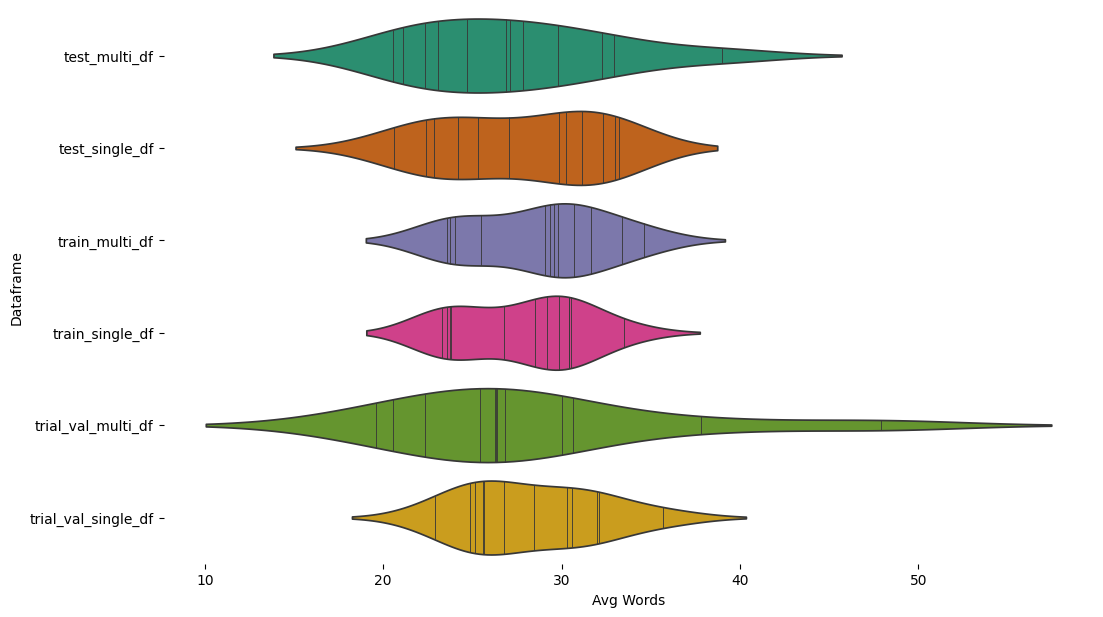

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(span_analysis['Dataframe'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(span_analysis, x='Avg Words', y='Dataframe', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

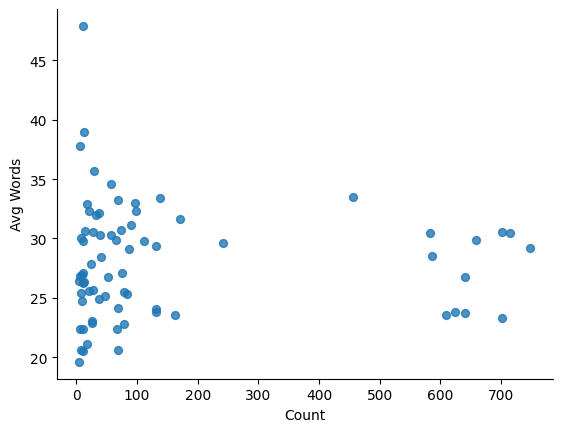

In [24]:
from matplotlib import pyplot as plt
span_analysis.plot(kind='scatter', x='Count', y='Avg Words', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-25-01bf0c89d620>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(span_analysis, x='Max Words', y='Dataframe', inner='stick', palette='Dark2')


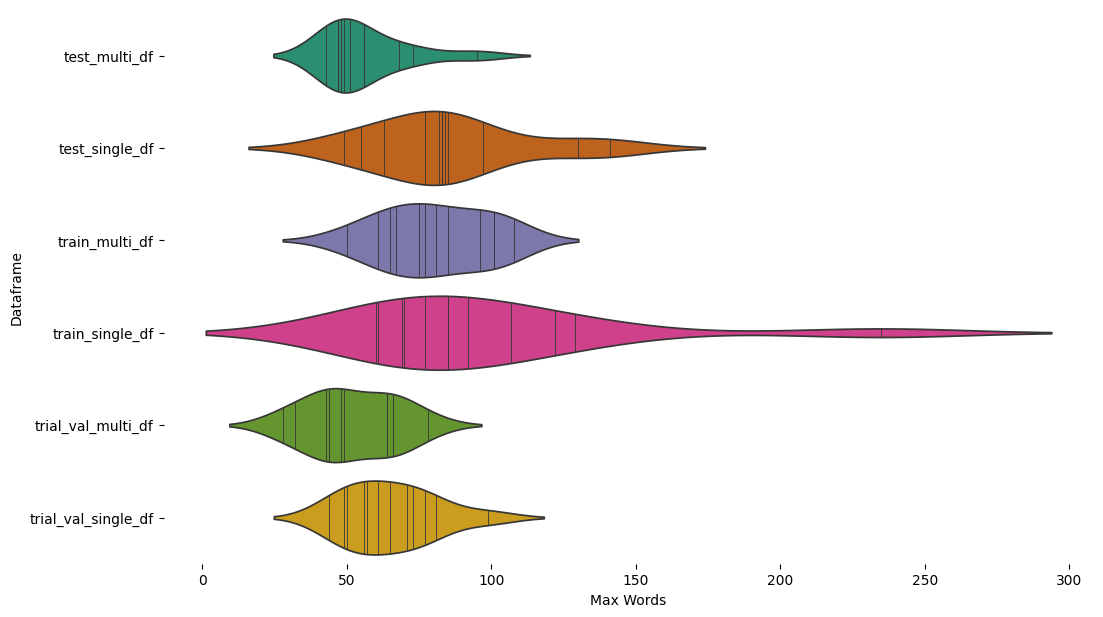

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(span_analysis['Dataframe'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(span_analysis, x='Max Words', y='Dataframe', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the sa

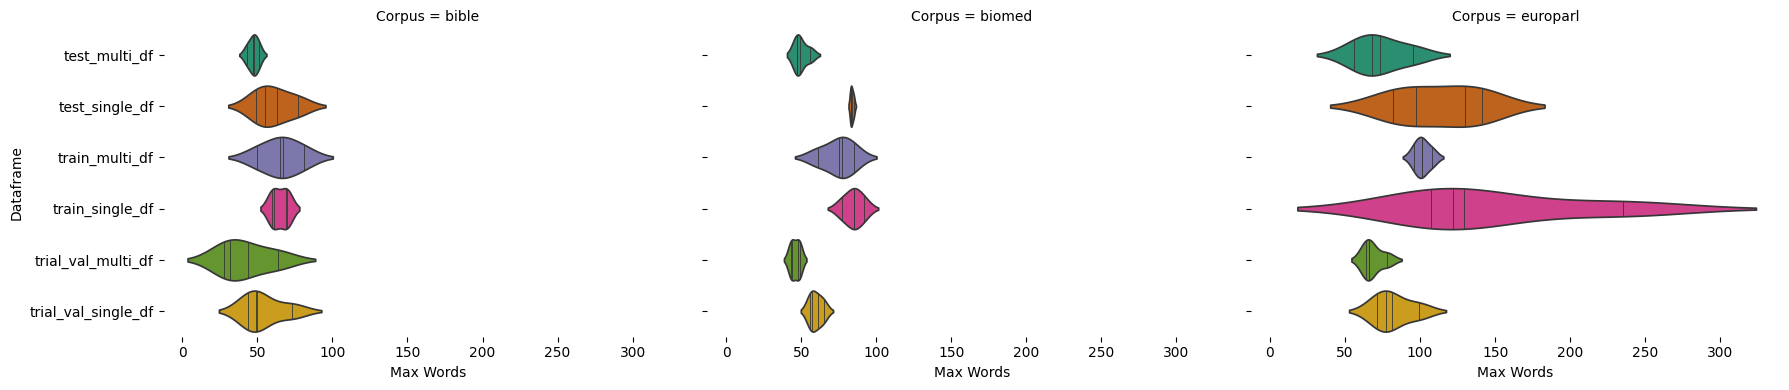

In [26]:

# Create a FacetGrid
g = sns.FacetGrid(span_analysis, col="Corpus", col_wrap=3, height=4, aspect=1.5)  # Adjust col_wrap and height as needed

# Map the violinplot to the FacetGrid
g.map(sns.violinplot, "Max Words", "Dataframe", inner='stick', palette='Dark2')

# Remove spines for cleaner look
g.despine(top=True, right=True, bottom=True, left=True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

- decision: no modifications to sentence spans will be applied, except for Contraction standardization

## Normalize / Eliminate Contractions

In [27]:

# --- STEP 1: CREATE A UTILITY FUNCTION ---

def expand_contractions_in_df(df):
    """
    1) Creates a new column 'sentence_no_contractions' by expanding any contractions.
    2) Identifies rows where a contraction was actually expanded (the text changed).
    3) Returns the updated DataFrame and a grouped subset of rows for printing examples.
    """
    df = df.copy()

    # Create the new column with expanded contractions
    df['sentence_no_contractions'] = df['sentence'].apply(
        lambda s: contractions.fix(s) if pd.notna(s) else s
    )

    # Check if anything changed after expansion:
    df['contraction_expanded'] = df.apply(
        lambda row: row['sentence'] != row['sentence_no_contractions'], axis=1
    )

    # Group by corpus
    results_by_corpus = {}
    for corpus_val, group in df.groupby('corpus'):
        # Filter to rows that actually had a contraction
        changed_rows = group[group['contraction_expanded']]
        # Take the first 3
        first_three = changed_rows.head(3)
        results_by_corpus[corpus_val] = first_three

    return df, results_by_corpus


# --- STEP 2: APPLY TO ALL 6 DATAFRAMES ---

dataframes_info = [
    ("train_single_df", train_single_df),
    ("train_multi_df", train_multi_df),
    ("trial_val_single_df", trial_val_single_df),
    ("trial_val_multi_df", trial_val_multi_df),
    ("test_single_df", test_single_df),
    ("test_multi_df", test_multi_df),
]

for df_name, df in dataframes_info:
    # Expand contractions and collect examples
    updated_df, corpus_examples = expand_contractions_in_df(df)

    # Overwrite the old DataFrame variable if desired:
    # (So that we retain the new column for future tasks)
    # Otherwise, you can store it in a new variable.
    globals()[df_name] = updated_df

    # Print 3 "before" and 3 "after" examples per corpus
    print(f"\n{'='*60}")
    print(f"DataFrame: {df_name}")
    print(f"{'='*60}")

    for corpus_val in sorted(corpus_examples.keys()):
        subset = corpus_examples[corpus_val]

        # Only proceed if we found any changed rows in this corpus
        if len(subset) == 0:
            continue

        print(f"\n  Corpus: {corpus_val}")

        # Print BEFORE lines
        print("    -- BEFORE --")
        for _, row in subset.iterrows():
            print(f"       {row['sentence']}")

        # Print AFTER lines
        print("    -- AFTER  --")
        for _, row in subset.iterrows():
            print(f"       {row['sentence_no_contractions']}")


DataFrame: train_single_df

  Corpus: bible
    -- BEFORE --
       Shimei had sixteen sons and six daughters; but his brothers didn't have many children, neither did all their family multiply like the children of Judah.
       When his speech is charming, don't believe him; for there are seven abominations in his heart.
       Jesus said, "Father, forgive them, for they don't know what they are doing."
    -- AFTER  --
       Shimei had sixteen sons and six daughters; but his brothers did not have many children, neither did all their family multiply like the children of Judah.
       When his speech is charming, do not believe him; for there are seven abominations in his heart.
       Jesus said, "Father, forgive them, for they do not know what they are doing."

  Corpus: biomed
    -- BEFORE --
       Although missense mutation of ITPR1 had previously been ruled out [2] and the mode of inheritance was inconsistent with that seen in the Itpr1Δ18 and Itpr1opt mice, the phenotypic pres

In [28]:
# check for null values

dataframes = [train_single_df, train_multi_df, trial_val_single_df, trial_val_multi_df, test_single_df, test_multi_df]
for df in dataframes:
  print(df['sentence_no_contractions'].isnull().values.any())


False
False
False
False
False
False


In [29]:
dataframes = {
    "train_single_df": train_single_df,
    "train_multi_df": train_multi_df,
    "trial_val_single_df": trial_val_single_df,
    "trial_val_multi_df": trial_val_multi_df,
    "test_single_df": test_single_df,
    "test_multi_df": test_multi_df
}

total_true_counts = 0
for df_name, df in dataframes.items():
    true_count = df['contraction_expanded'].sum()
    print(f"{df_name}: {true_count} True values in 'contraction_expanded'")
    total_true_counts += true_count

print(f"\nTotal True values across all dataframes: {total_true_counts}")


train_single_df: 254 True values in 'contraction_expanded'
train_multi_df: 54 True values in 'contraction_expanded'
trial_val_single_df: 16 True values in 'contraction_expanded'
trial_val_multi_df: 0 True values in 'contraction_expanded'
test_single_df: 31 True values in 'contraction_expanded'
test_multi_df: 7 True values in 'contraction_expanded'

Total True values across all dataframes: 362


In [30]:
# verify column headers

dataframes = [train_single_df, train_multi_df, trial_val_single_df, trial_val_multi_df, test_single_df, test_multi_df]
for df in dataframes:
  print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        7662 non-null   object 
 1   corpus                    7662 non-null   object 
 2   sentence                  7662 non-null   object 
 3   token                     7655 non-null   object 
 4   complexity                7662 non-null   float64
 5   sentence_no_contractions  7662 non-null   object 
 6   contraction_expanded      7662 non-null   bool   
dtypes: bool(1), float64(1), object(5)
memory usage: 366.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1517 non-null   object 
 1   corpus                    1517 non-null   object 
 2   

In [31]:
# inspect each df

dataframes = [train_single_df, train_multi_df, trial_val_single_df, trial_val_multi_df, test_single_df, test_multi_df]
for df in dataframes:
  print(df.head())

                               id corpus                                           sentence     token  complexity                           sentence_no_contractions  contraction_expanded
0  3ZLW647WALVGE8EBR50EGUBPU4P32A  bible  Behold, there came up out of the river seven c...     river    0.000000  Behold, there came up out of the river seven c...                 False
1  34R0BODSP1ZBN3DVY8J8XSIY551E5C  bible  I am a fellow bondservant with you and with yo...  brothers    0.000000  I am a fellow bondservant with you and with yo...                 False
2  3S1WOPCJFGTJU2SGNAN2Y213N6WJE3  bible  The man, the lord of the land, said to us, 'By...  brothers    0.050000  The man, the lord of the land, said to us, 'By...                 False
3  3BFNCI9LYKQN09BHXHH9CLSX5KP738  bible  Shimei had sixteen sons and six daughters; but...  brothers    0.150000  Shimei had sixteen sons and six daughters; but...                  True
4  3G5RUKN2EC3YIWSKUXZ8ZVH95R49N2  bible               "He has pu

In [32]:
from nltk.tokenize import RegexpTokenizer
import pandas as pd
import numpy as np

tokenizer = RegexpTokenizer(r'\w+')  # same tokenizer as before

def analyze_sentence_spans_by_corpus_and_quartile_no_contracts(dfs_dict):
    """
    Analyze sentence spans (length metrics) grouped by corpus and complexity quartile
    for multiple dataframes, but this time using the 'sentence_no_contractions' column
    instead of the original 'sentence'.
    """
    results = []

    for df_name, df in dfs_dict.items():
        print(f"Processing {df_name} on 'sentence_no_contractions'...")

        # Make a copy to avoid altering the original
        df = df.copy()

        # Calculate complexity quartiles (unchanged logic)
        q1 = df['complexity'].quantile(0.25)
        q2 = df['complexity'].quantile(0.50)
        q3 = df['complexity'].quantile(0.75)

        # Function to map complexity to quartiles
        def get_quartile(x):
            if x <= q1:
                return 'Q1'
            elif x <= q2:
                return 'Q2'
            elif x <= q3:
                return 'Q3'
            else:
                return 'Q4'

        # Create a new column storing quartile label
        df['quartile'] = df['complexity'].apply(get_quartile)

        # Define a local function to compute sentence metrics
        def compute_span_metrics_no_contracts(sentence):
            if pd.isna(sentence):
                return pd.Series({'word_count': 0, 'char_count': 0, 'avg_word_len': 0})

            words = tokenizer.tokenize(sentence)
            word_count = len(words)
            char_count = len(sentence)
            avg_word_len = np.mean([len(w) for w in words]) if word_count > 0 else 0

            return pd.Series({
                'word_count': word_count,
                'char_count': char_count,
                'avg_word_len': avg_word_len
            })

        # Apply our function to 'sentence_no_contractions'
        span_metrics_nc = df['sentence_no_contractions'].apply(compute_span_metrics_no_contracts)
        # Merge the results back into df
        df = pd.concat([df, span_metrics_nc], axis=1)

        # Group by corpus + quartile, same as before
        corpus_col = 'corpus'  # or subcorpus if you have that column
        for corpus_name, corpus_df in df.groupby(corpus_col):
            for quartile, quartile_df in corpus_df.groupby('quartile'):
                complexity_range = f"{quartile_df['complexity'].min():.3f}-{quartile_df['complexity'].max():.3f}"
                stats = {
                    'Dataframe': df_name,
                    'Corpus': corpus_name,
                    'Quartile': quartile,
                    'Complexity Range': complexity_range,
                    'Count': len(quartile_df),
                    'Avg Words': quartile_df['word_count'].mean(),
                    'Median Words': quartile_df['word_count'].median(),
                    'Min Words': quartile_df['word_count'].min(),
                    'Max Words': quartile_df['word_count'].max(),
                    'Std Words': quartile_df['word_count'].std(),
                    'Avg Chars': quartile_df['char_count'].mean(),
                    'Avg Word Len': quartile_df['avg_word_len'].mean()
                }
                results.append(stats)

    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(['Dataframe', 'Corpus', 'Quartile'])

    return results_df


# Example usage:
dfs = {
    'train_single_df': train_single_df,
    'train_multi_df': train_multi_df,
    'trial_val_single_df': trial_val_single_df,
    'trial_val_multi_df': trial_val_multi_df,
    'test_single_df': test_single_df,
    'test_multi_df': test_multi_df
}

span_analysis_nc = analyze_sentence_spans_by_corpus_and_quartile_no_contracts(dfs)

# Show results
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
display(span_analysis_nc)

# Save results
results_path_nc = os.path.join(dir_results, 'sentence_span_analysis_no_contractions.csv')
span_analysis_nc.to_csv(results_path_nc, index=False)
print(f"Analysis (NO CONTRACTIONS) saved to: {results_path_nc}")


Processing train_single_df on 'sentence_no_contractions'...
Processing train_multi_df on 'sentence_no_contractions'...
Processing trial_val_single_df on 'sentence_no_contractions'...
Processing trial_val_multi_df on 'sentence_no_contractions'...
Processing test_single_df on 'sentence_no_contractions'...
Processing test_multi_df on 'sentence_no_contractions'...


,Dataframe,Corpus,Quartile,Complexity Range,Count,Avg Words,Median Words,Min Words,Max Words,Std Words,Avg Chars,Avg Word Len
60,test_multi_df,bible,Q1,0.025-0.317,26,23.076923,22.0,4.0,48.0,11.831900,118.730769,4.131249
61,test_multi_df,bible,Q2,0.325-0.417,11,20.545455,17.0,7.0,47.0,12.917923,109.636364,4.213539
62,test_multi_df,bible,Q3,0.432-0.528,18,21.055556,21.5,4.0,43.0,10.843660,113.166667,4.498610
63,test_multi_df,bible,Q4,0.542-0.694,11,22.363636,20.0,7.0,51.0,11.935432,126.181818,4.605062
64,test_multi_df,biomed,Q1,0.000-0.312,11,29.818182,29.0,17.0,47.0,8.388304,195.727273,5.491145
65,test_multi_df,biomed,Q2,0.324-0.417,11,27.090909,24.0,9.0,47.0,11.449494,171.818182,5.436237
66,test_multi_df,biomed,Q3,0.456-0.528,10,26.900000,26.5,10.0,49.0,10.712921,177.500000,5.497409
67,test_multi_df,biomed,Q4,0.562-0.800,21,32.285714,34.0,14.0,56.0,13.598319,209.285714,5.460101
68,test_multi_df,europarl,Q1,0.214-0.303,10,24.700000,24.5,7.0,56.0,14.189589,146.900000,5.049688
69,test_multi_df,europarl,Q2,0.321-0.429,24,27.833333,27.0,9.0,73.0,15.352855,172.291667,5.269610


Analysis (NO CONTRACTIONS) saved to: /content/drive/MyDrive/266-final/results/sentence_span_analysis_no_contractions.csv


- contraction processing successfuly, confirmed with Avg Word deltas between 'sentence' and 'sentence_no_contractions'

## Enrich Datset with PoS Tags, Dependency Parsing, and Morphological Complexity

In [33]:
# !pip install -q spacy
# !python -m spacy download en_core_web_trf
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 2.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [34]:
nlp = spacy.load("en_core_web_lg")


In [35]:
# prompt: run a test with nlp, my spacy instance

# Sample text for testing
text = "This is a sample sentence for testing spaCy."

# Process the text with spaCy
doc = nlp(text)

# Print the tokens and their part-of-speech tags
for token in doc:
    print(f"Token: {token.text}, POS: {token.pos_}, Dependency: {token.dep_}")


Token: This, POS: PRON, Dependency: nsubj
Token: is, POS: AUX, Dependency: ROOT
Token: a, POS: DET, Dependency: det
Token: sample, POS: NOUN, Dependency: compound
Token: sentence, POS: NOUN, Dependency: attr
Token: for, POS: ADP, Dependency: prep
Token: testing, POS: VERB, Dependency: pcomp
Token: spaCy, POS: PROPN, Dependency: dobj
Token: ., POS: PUNCT, Dependency: punct


In [36]:
def enrich_with_spacy(df, text_col='sentence_no_contractions'):
    """
    Processes the 'text_col' with spaCy and appends:
      pos_sequence, dep_sequence, morph_sequence,
      and morph_complexity (float) per row.
    """
    df = df.copy()

    pos_tags = []
    dep_tags = []
    morph_tags = []
    morph_complexities = []

    for text in df[text_col]:
        if pd.isna(text) or not text.strip():
            # If text is NaN or empty, store defaults
            pos_tags.append([])
            dep_tags.append([])
            morph_tags.append([])
            morph_complexities.append(0.0)
            continue

        doc = nlp(text)

        # Build sequences
        pos_seq = [token.pos_ for token in doc]            # e.g. ["DET", "NOUN", "VERB"]
        dep_seq = [token.dep_ for token in doc]            # e.g. ["det", "nsubj", "ROOT"]
        morph_seq = [token.morph for token in doc]         # e.g. [Number=Sing|Person=3, ...]

        # Count morphological features
        total_features = 0
        for token in doc:
            # token.morph.to_dict() => a dict of morphological attributes
            features_dict = token.morph.to_dict()
            total_features += len(features_dict)

        # Average morphological features across tokens
        avg_morph = total_features / len(doc)

        pos_tags.append(pos_seq)
        dep_tags.append(dep_seq)
        morph_tags.append(morph_seq)
        morph_complexities.append(avg_morph)

    # Add these lists as new columns
    df['pos_sequence'] = pos_tags
    df['dep_sequence'] = dep_tags
    df['morph_sequence'] = morph_tags
    df['morph_complexity'] = morph_complexities

    return df


In [37]:
dataframes_info = [
    ("train_single_df", train_single_df),
    ("train_multi_df", train_multi_df),
    ("trial_val_single_df", trial_val_single_df),
    ("trial_val_multi_df", trial_val_multi_df),
    ("test_single_df", test_single_df),
    ("test_multi_df", test_multi_df),
]

for df_name, df in dataframes_info:
    print(f"Enriching {df_name} with spaCy features...")
    enriched_df = enrich_with_spacy(df, text_col='sentence_no_contractions')
    # Overwrite the old DataFrame variable (or store it somewhere new)
    globals()[df_name] = enriched_df
    print(f"Done! Now '{df_name}' has columns: pos_sequence, dep_sequence, morph_sequence, morph_complexity.\n")


Enriching train_single_df with spaCy features...
Done! Now 'train_single_df' has columns: pos_sequence, dep_sequence, morph_sequence, morph_complexity.

Enriching train_multi_df with spaCy features...
Done! Now 'train_multi_df' has columns: pos_sequence, dep_sequence, morph_sequence, morph_complexity.

Enriching trial_val_single_df with spaCy features...
Done! Now 'trial_val_single_df' has columns: pos_sequence, dep_sequence, morph_sequence, morph_complexity.

Enriching trial_val_multi_df with spaCy features...
Done! Now 'trial_val_multi_df' has columns: pos_sequence, dep_sequence, morph_sequence, morph_complexity.

Enriching test_single_df with spaCy features...
Done! Now 'test_single_df' has columns: pos_sequence, dep_sequence, morph_sequence, morph_complexity.

Enriching test_multi_df with spaCy features...
Done! Now 'test_multi_df' has columns: pos_sequence, dep_sequence, morph_sequence, morph_complexity.



In [38]:
for df_name, df in dataframes_info:
    print(f"\n{'='*50}")
    print(f"DataFrame: {df_name}")
    print(f"{'='*50}\n")
    sample_df = globals()[df_name].sample(3, random_state=42)
    display(sample_df[['sentence_no_contractions', 'pos_sequence', 'dep_sequence', 'morph_sequence', 'morph_complexity']])



DataFrame: train_single_df



,sentence_no_contractions,pos_sequence,dep_sequence,morph_sequence,morph_complexity
5061,The transgenic approach that was used to creat...,"[DET, ADJ, NOUN, PRON, AUX, VERB, PART, VERB, ...","[det, amod, nsubjpass, nsubjpass, auxpass, rel...","[(Definite=Def, PronType=Art), (Degree=Pos), (...",1.500000
2471,"When the report comes to Egypt, they will be i...","[SCONJ, DET, NOUN, VERB, ADP, PROPN, PUNCT, PR...","[advmod, det, nsubj, advcl, prep, pobj, punct,...","[(), (Definite=Def, PronType=Art), (Number=Sin...",1.166667
800,"Saul asked counsel of God, ""Shall I go down af...","[PROPN, VERB, NOUN, ADP, PROPN, PUNCT, PUNCT, ...","[nsubj, ROOT, dobj, prep, pobj, punct, punct, ...","[(Number=Sing), (Tense=Past, VerbForm=Fin), (N...",1.200000



DataFrame: train_multi_df



,sentence_no_contractions,pos_sequence,dep_sequence,morph_sequence,morph_complexity
724,BRCA2 may thus promote RAD51 assembly into rec...,"[PROPN, AUX, ADV, VERB, PROPN, NOUN, ADP, ADJ,...","[nsubj, aux, advmod, ROOT, compound, dobj, pre...","[(Number=Sing), (VerbForm=Fin), (), (VerbForm=...",1.222222
812,"Therefore, BMPR1A appears to maintain articula...","[ADV, PUNCT, PROPN, VERB, PART, VERB, ADJ, NOU...","[advmod, punct, nsubj, ROOT, aux, xcomp, amod,...","[(), (PunctType=Comm), (Number=Sing), (Number=...",1.000000
1466,Continued support for the renewal and modernis...,"[VERB, NOUN, ADP, DET, NOUN, CCONJ, NOUN, ADP,...","[amod, nsubj, prep, det, pobj, cc, conj, prep,...","[(Aspect=Perf, Tense=Past, VerbForm=Part), (Nu...",1.205882



DataFrame: trial_val_single_df



,sentence_no_contractions,pos_sequence,dep_sequence,morph_sequence,morph_complexity
145,"However, this reduction in bone resorption occ...","[ADV, PUNCT, DET, NOUN, ADP, NOUN, NOUN, VERB,...","[advmod, punct, det, nsubj, prep, compound, po...","[(), (PunctType=Comm), (Number=Sing, PronType=...",1.0000
335,A word of thanks is also due to many non-gover...,"[DET, NOUN, ADP, NOUN, AUX, ADV, ADJ, ADP, ADJ...","[det, nsubj, prep, pobj, ROOT, advmod, prep, p...","[(Definite=Ind, PronType=Art), (Number=Sing), ...",1.0625
175,To test the hypothesis that a temporal delay i...,"[PART, VERB, DET, NOUN, SCONJ, DET, ADJ, NOUN,...","[aux, advcl, det, dobj, mark, det, amod, nsubj...","[(), (VerbForm=Inf), (Definite=Def, PronType=A...",1.2000



DataFrame: trial_val_multi_df



,sentence_no_contractions,pos_sequence,dep_sequence,morph_sequence,morph_complexity
62,"by Mr Virrankoski, on behalf of the Committee ...","[ADP, PROPN, PROPN, PUNCT, ADP, NOUN, ADP, DET...","[prep, compound, pobj, punct, prep, pobj, prep...","[(), (Number=Sing), (Number=Sing), (PunctType=...",0.892857
40,"Indeed, we recently showed that neural crest c...","[ADV, PUNCT, PRON, ADV, VERB, SCONJ, ADJ, PROP...","[advmod, punct, nsubj, advmod, ROOT, mark, com...","[(), (PunctType=Comm), (Case=Nom, Number=Plur,...",1.108696
95,"It is not an easy task, particularly for the c...","[PRON, AUX, PART, DET, ADJ, NOUN, PUNCT, ADV, ...","[nsubj, ROOT, neg, det, amod, attr, punct, adv...","[(Case=Nom, Gender=Neut, Number=Sing, Person=3...",1.180328



DataFrame: test_single_df



,sentence_no_contractions,pos_sequence,dep_sequence,morph_sequence,morph_complexity
668,It is therefore not a matter of indifference h...,"[PRON, AUX, ADV, PART, DET, NOUN, ADP, NOUN, S...","[nsubj, ROOT, advmod, neg, det, attr, prep, po...","[(Case=Nom, Gender=Neut, Number=Sing, Person=3...",1.200000
30,then shall he offer with the bull a meal offer...,"[ADV, AUX, PRON, VERB, ADP, DET, NOUN, DET, NO...","[advmod, aux, nsubj, ROOT, prep, det, pobj, de...","[(PronType=Dem), (VerbType=Mod), (Case=Nom, Ge...",1.071429
377,While they do have their limitations (e.g. dev...,"[SCONJ, PRON, AUX, VERB, PRON, NOUN, PUNCT, AD...","[mark, nsubj, aux, advcl, poss, dobj, punct, a...","[(), (Case=Nom, Number=Plur, Person=3, PronTyp...",1.157895



DataFrame: test_multi_df



,sentence_no_contractions,pos_sequence,dep_sequence,morph_sequence,morph_complexity
19,"God said, ""Let the earth yield grass, herbs yi...","[PROPN, VERB, PUNCT, PUNCT, VERB, DET, NOUN, V...","[nsubj, ROOT, punct, punct, xcomp, det, nsubj,...","[(Number=Sing), (Tense=Past, VerbForm=Fin), (P...",1.564103
42,Moreover I will make a covenant of peace with ...,"[ADV, PRON, AUX, VERB, DET, NOUN, ADP, NOUN, A...","[advmod, nsubj, aux, ccomp, det, dobj, prep, p...","[(), (Case=Nom, Number=Sing, Person=1, PronTyp...",1.550000
156,Developing innovation policy is crucial to EU ...,"[VERB, NOUN, NOUN, AUX, ADJ, ADP, PROPN, NOUN,...","[csubj, compound, dobj, ROOT, acomp, prep, com...","[(Aspect=Prog, Tense=Pres, VerbForm=Part), (Nu...",1.333333


In [39]:
# verify column headers

dataframes = [train_single_df, train_multi_df, trial_val_single_df, trial_val_multi_df, test_single_df, test_multi_df]
for df in dataframes:
  print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        7662 non-null   object 
 1   corpus                    7662 non-null   object 
 2   sentence                  7662 non-null   object 
 3   token                     7655 non-null   object 
 4   complexity                7662 non-null   float64
 5   sentence_no_contractions  7662 non-null   object 
 6   contraction_expanded      7662 non-null   bool   
 7   pos_sequence              7662 non-null   object 
 8   dep_sequence              7662 non-null   object 
 9   morph_sequence            7662 non-null   object 
 10  morph_complexity          7662 non-null   float64
dtypes: bool(1), float64(2), object(8)
memory usage: 606.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 11 columns):
 # 

## Create Binarized Outcome Variable, based on train_single_df median and train_multi_df median, applied to trial-val and test

In [40]:
# Step 1: Compute the median for single-token train set
train_single_median = train_single_df['complexity'].median()

# Step 2: Define a function that applies the threshold
def binarize_complexity(value, threshold):
    """
    If value <= threshold, return 0, else return 1.
    """
    if value <= threshold:
        return 0
    else:
        return 1

# Step 3: Create 'binary_complexity' in the three single-token DataFrames
train_single_df['binary_complexity'] = train_single_df['complexity'].apply(
    lambda x: binarize_complexity(x, train_single_median)
)
trial_val_single_df['binary_complexity'] = trial_val_single_df['complexity'].apply(
    lambda x: binarize_complexity(x, train_single_median)
)
test_single_df['binary_complexity'] = test_single_df['complexity'].apply(
    lambda x: binarize_complexity(x, train_single_median)
)

# Step 4: Compute the median for multi-token train set
train_multi_median = train_multi_df['complexity'].median()

# Step 5: Create 'binary_complexity' in the three multi-token DataFrames
train_multi_df['binary_complexity'] = train_multi_df['complexity'].apply(
    lambda x: binarize_complexity(x, train_multi_median)
)
trial_val_multi_df['binary_complexity'] = trial_val_multi_df['complexity'].apply(
    lambda x: binarize_complexity(x, train_multi_median)
)
test_multi_df['binary_complexity'] = test_multi_df['complexity'].apply(
    lambda x: binarize_complexity(x, train_multi_median)
)

# Step 6: (Optional) Print out the medians and some basic info
print(f"Median complexity (single): {train_single_median}")
print(f"Median complexity (multi): {train_multi_median}")

print("\nSample rows from train_single_df:")
print(train_single_df[['id', 'complexity', 'binary_complexity']].head())

print("\nSample rows from train_multi_df:")
print(train_multi_df[['id', 'complexity', 'binary_complexity']].head())


Median complexity (single): 0.2794117647058823
Median complexity (multi): 0.409090909090909

Sample rows from train_single_df:
                               id  complexity  binary_complexity
0  3ZLW647WALVGE8EBR50EGUBPU4P32A    0.000000                  0
1  34R0BODSP1ZBN3DVY8J8XSIY551E5C    0.000000                  0
2  3S1WOPCJFGTJU2SGNAN2Y213N6WJE3    0.050000                  0
3  3BFNCI9LYKQN09BHXHH9CLSX5KP738    0.150000                  0
4  3G5RUKN2EC3YIWSKUXZ8ZVH95R49N2    0.263889                  0

Sample rows from train_multi_df:
                               id  complexity  binary_complexity
0  3S37Y8CWI80N8KVM53U4E6JKCDC4WE    0.027778                  0
1  3WGCNLZJKF877FYC1Q6COKNWTDWD11    0.050000                  0
2  3UOMW19E6D6WQ5TH2HDD74IVKTP5CB    0.050000                  0
3  36JW4WBR06KF9AXMUL4N476OMF8FHD    0.050000                  0
4  3HRWUH63QU2FH9Q8R7MRNFC7JX2N5A    0.075000                  0


In [44]:
# verify column headers

dataframes = [train_single_df, train_multi_df, trial_val_single_df, trial_val_multi_df, test_single_df, test_multi_df]
for df in dataframes:
  print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        7662 non-null   object 
 1   corpus                    7662 non-null   object 
 2   sentence                  7662 non-null   object 
 3   token                     7655 non-null   object 
 4   complexity                7662 non-null   float64
 5   sentence_no_contractions  7662 non-null   object 
 6   contraction_expanded      7662 non-null   bool   
 7   pos_sequence              7662 non-null   object 
 8   dep_sequence              7662 non-null   object 
 9   morph_sequence            7662 non-null   object 
 10  morph_complexity          7662 non-null   float64
 11  binary_complexity         7662 non-null   int64  
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 666.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIn

In [45]:
# inspect each df

dataframes = [train_single_df, train_multi_df, trial_val_single_df, trial_val_multi_df, test_single_df, test_multi_df]
for df in dataframes:
  print(df.head())

                               id corpus                                           sentence     token  complexity                           sentence_no_contractions  contraction_expanded                                       pos_sequence                                       dep_sequence                                     morph_sequence  morph_complexity  binary_complexity
0  3ZLW647WALVGE8EBR50EGUBPU4P32A  bible  Behold, there came up out of the river seven c...     river    0.000000  Behold, there came up out of the river seven c...                 False  [ADV, PUNCT, PRON, VERB, ADP, ADP, ADP, DET, N...  [advmod, punct, expl, ROOT, prt, prep, prep, d...  [(), (PunctType=Comm), (), (Tense=Past, VerbFo...          1.041667                  0
1  34R0BODSP1ZBN3DVY8J8XSIY551E5C  bible  I am a fellow bondservant with you and with yo...  brothers    0.000000  I am a fellow bondservant with you and with yo...                 False  [PRON, AUX, DET, ADJ, NOUN, ADP, PRON, CCONJ, ...  [nsubj,

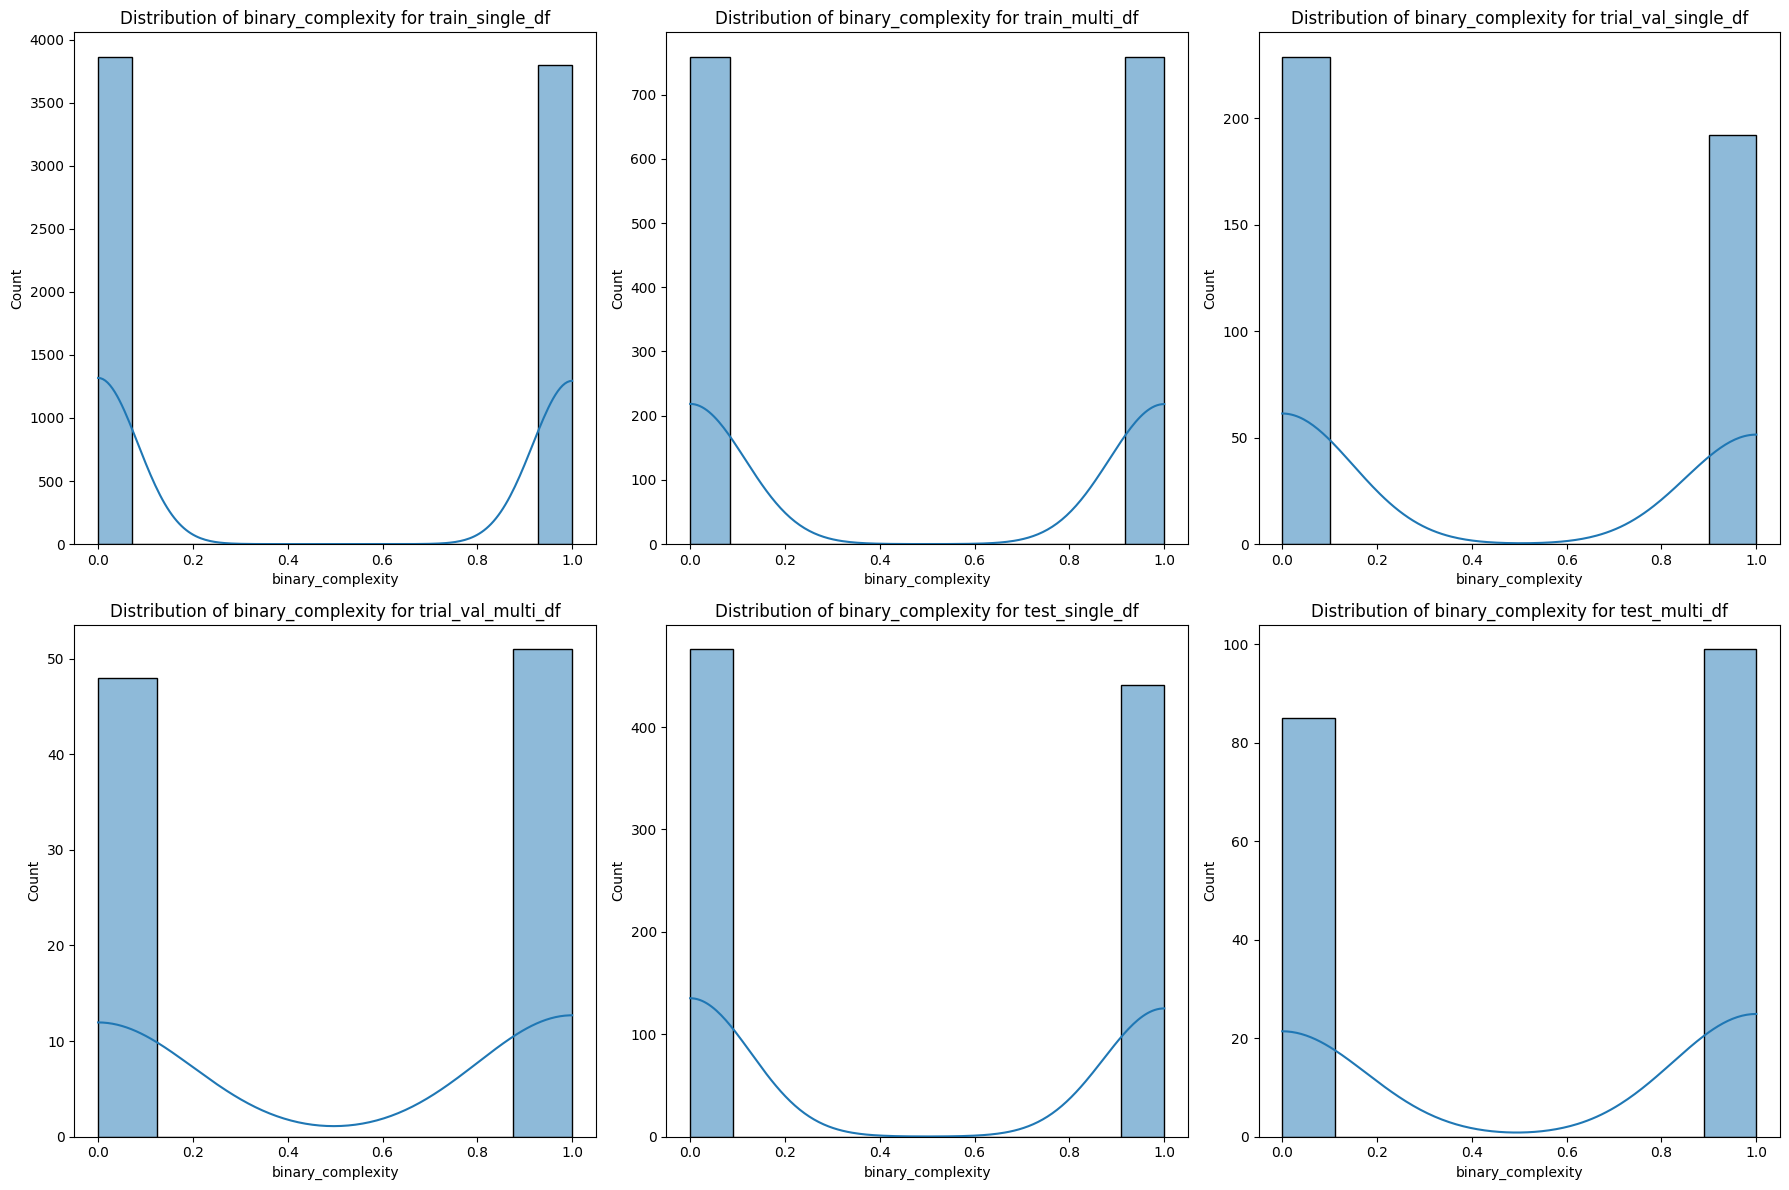

In [46]:
# prompt: show me the distributions of binary_complexity for all 6 dataframes

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframes are named as in the provided code:
dataframes = {
    "train_single_df": train_single_df,
    "train_multi_df": train_multi_df,
    "trial_val_single_df": trial_val_single_df,
    "trial_val_multi_df": trial_val_multi_df,
    "test_single_df": test_single_df,
    "test_multi_df": test_multi_df
}

# Create a figure and axes for the subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Adjust figsize as needed

# Iterate through dataframes and create distributions
for i, (df_name, df) in enumerate(dataframes.items()):
  row = i // 3
  col = i % 3
  ax = axes[row, col]
  sns.histplot(df['binary_complexity'], kde=True, ax=ax) #kde=True adds a kernel density estimate
  ax.set_title(f'Distribution of binary_complexity for {df_name}')
  ax.set_xlabel('binary_complexity')

plt.tight_layout() # Adjust subplot params for a tight layout
plt.show()


In [49]:
!ls -R /content/drive/MyDrive/266-final/data/266-comp-lex-master/

/content/drive/MyDrive/266-final/data/266-comp-lex-master/:
fe-test-labels	fe-train  fe-trial-val	test-labels  train  trial

/content/drive/MyDrive/266-final/data/266-comp-lex-master/fe-test-labels:

/content/drive/MyDrive/266-final/data/266-comp-lex-master/fe-train:

/content/drive/MyDrive/266-final/data/266-comp-lex-master/fe-trial-val:

/content/drive/MyDrive/266-final/data/266-comp-lex-master/test-labels:
lcp_multi_test.tsv  lcp_single_test.tsv

/content/drive/MyDrive/266-final/data/266-comp-lex-master/train:
lcp_multi_train.tsv  lcp_single_train.tsv

/content/drive/MyDrive/266-final/data/266-comp-lex-master/trial:
lcp_multi_trial.tsv  lcp_single_trial.tsv


In [50]:
!tree /content/drive/MyDrive/266-final/data/266-comp-lex-master/

/content/drive/MyDrive/266-final/data/266-comp-lex-master/
├── fe-test-labels
├── fe-train
├── fe-trial-val
├── test-labels
│   ├── lcp_multi_test.tsv
│   └── lcp_single_test.tsv
├── train
│   ├── lcp_multi_train.tsv
│   └── lcp_single_train.tsv
└── trial
    ├── lcp_multi_trial.tsv
    └── lcp_single_trial.tsv

6 directories, 6 files


In [51]:
# prompt: save all 6 dataframes to fe-test-labels, fe-train, fe-trial-val which are subdirectories located in /content/drive/MyDrive/266-final/data/266-comp-lex-master/

import os
# Assuming your dataframes are named as in the provided code:
dataframes = {
    "train_single_df": train_single_df,
    "train_multi_df": train_multi_df,
    "trial_val_single_df": trial_val_single_df,
    "trial_val_multi_df": trial_val_multi_df,
    "test_single_df": test_single_df,
    "test_multi_df": test_multi_df
}

base_dir = "/content/drive/MyDrive/266-final/data/266-comp-lex-master/"

for df_name, df in dataframes.items():
    subdir = None
    if "train" in df_name:
      subdir = "fe-train"
    elif "trial_val" in df_name:
      subdir = "fe-trial-val"
    elif "test" in df_name:
      subdir = "fe-test-labels"

    if subdir:
      save_path = os.path.join(base_dir, subdir, f"{df_name}.csv")
      os.makedirs(os.path.dirname(save_path), exist_ok=True) # create directory if it doesn't exist
      df.to_csv(save_path, index=False)
      print(f"Saved {df_name} to {save_path}")


Saved train_single_df to /content/drive/MyDrive/266-final/data/266-comp-lex-master/fe-train/train_single_df.csv
Saved train_multi_df to /content/drive/MyDrive/266-final/data/266-comp-lex-master/fe-train/train_multi_df.csv
Saved trial_val_single_df to /content/drive/MyDrive/266-final/data/266-comp-lex-master/fe-trial-val/trial_val_single_df.csv
Saved trial_val_multi_df to /content/drive/MyDrive/266-final/data/266-comp-lex-master/fe-trial-val/trial_val_multi_df.csv
Saved test_single_df to /content/drive/MyDrive/266-final/data/266-comp-lex-master/fe-test-labels/test_single_df.csv
Saved test_multi_df to /content/drive/MyDrive/266-final/data/266-comp-lex-master/fe-test-labels/test_multi_df.csv


In [52]:
!tree /content/drive/MyDrive/266-final/data/266-comp-lex-master/

/content/drive/MyDrive/266-final/data/266-comp-lex-master/
├── fe-test-labels
│   ├── test_multi_df.csv
│   └── test_single_df.csv
├── fe-train
│   ├── train_multi_df.csv
│   └── train_single_df.csv
├── fe-trial-val
│   ├── trial_val_multi_df.csv
│   └── trial_val_single_df.csv
├── test-labels
│   ├── lcp_multi_test.tsv
│   └── lcp_single_test.tsv
├── train
│   ├── lcp_multi_train.tsv
│   └── lcp_single_train.tsv
└── trial
    ├── lcp_multi_trial.tsv
    └── lcp_single_trial.tsv

6 directories, 12 files
